In [11]:
import pandas as pd
import numpy as np
import torch
from src.plot_utils import *
from src.space_model import space_model
from src.nn_model import nnModel

In [2]:
df = pd.read_json('./Data/sample_match_1_with_v.json')
e_df = pd.read_json('./Data/sample_Game_1_events.json')

In [3]:
p_model = pc_model()

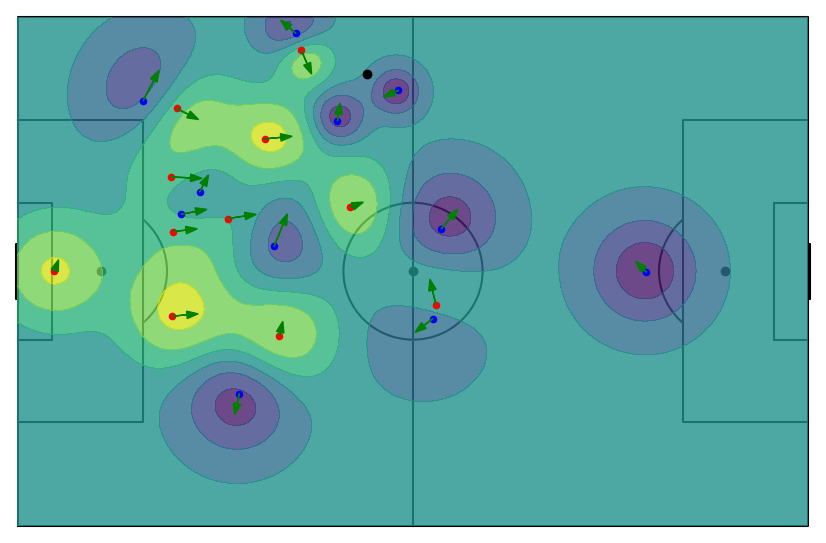

In [4]:
_, _, _ = p_model.plot_frame(1000)

In [5]:
sp_model = space_model(df, e_df)

In [6]:
sp_model.df.head()

,Period,Frame,Time [s],H11_x,H11_y,H1_x,H1_y,H2_x,H2_y,H3_x,...,A12_x_v,A12_y_v,A12_v_abs,A13_x_v,A13_y_v,A13_v_abs,A14_x_v,A14_y_v,A14_v_abs,owning
2,1,1,0.04,0.08528,32.80184,33.95392,44.41896,35.04904,33.22684,32.16408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,1,2,0.08,0.09984,32.80184,33.95392,44.41896,35.04904,33.22684,32.16408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1,3,0.12,0.11856,32.80184,33.95392,44.41896,35.04904,33.22684,32.16408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
5,1,4,0.16,0.12584,32.80184,33.92688,44.41556,35.03448,33.31184,32.18176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
6,1,5,0.20,0.13416,32.80184,33.90088,44.38292,35.01056,33.33224,32.18592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [7]:
sp_model.set_frame(1000)

In [8]:
sp_model.set_frame_flag

True

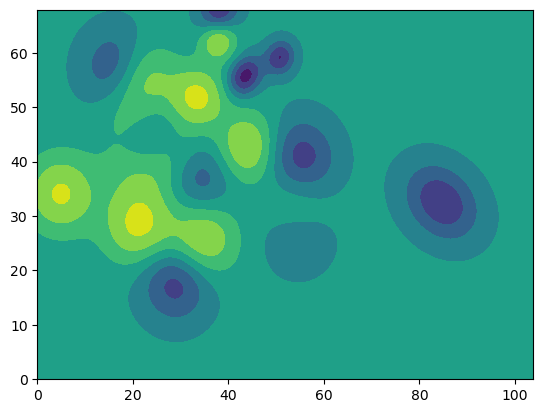

In [9]:
x, y = np.mgrid[0:104:0.1, 0:68:0.1]
locations = np.concatenate([x.reshape(-1,1), y.reshape(-1,1)], axis=1)
z = sp_model.pitch_control(locations)
plt.contourf(x.reshape(1040, 680), y.reshape(1040, 680), z.reshape(1040, 680))

In [ ]:
nn_model = nnModel()
nn_model.load_state_dict(torch.load('./SpaceValueModel/best_svmodel_sdict.pt'))

tensor([[0.4419, 0.8881, 0.0000, 0.0000],
        [0.4419, 0.8881, 0.0000, 0.0015],
        [0.4419, 0.8881, 0.0000, 0.0029],
        ...,
        [0.4419, 0.8881, 0.9990, 0.9956],
        [0.4419, 0.8881, 0.9990, 0.9971],
        [0.4419, 0.8881, 0.9990, 0.9985]])
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


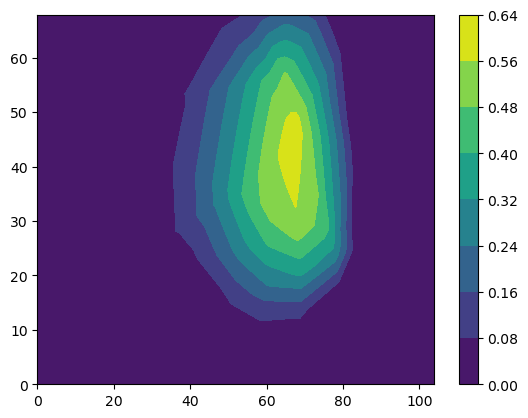

In [10]:
x, y = np.mgrid[0:104:0.1, 0:68:0.1]
locations = np.concatenate([x.reshape(-1,1), y.reshape(-1,1)], axis=1)
z = sp_model.space_value(locations)
plt.contourf(x.reshape(1040, 680), y.reshape(1040, 680), z.reshape(1040, 680))
plt.colorbar()

In [11]:
sp_model.space_value(np.array([[59, 30], [30, 10], [70, 20]])[0])

tensor([[0.4419, 0.8881, 0.5673, 0.4412]])
[[0.7569325]]


array([0.])

In [25]:
b = np.array([[59, 30], [30, 10]])[0].reshape(-1, 2)[:,0].reshape(-1, 1)

In [12]:
sp_model.distance_from_goal(10, 20)

0.0

In [12]:
nn_model = nnModel()
nn_model.load_state_dict(torch.load('./SpaceValueModel/best_svmodel_sdict.pt'))

x = locations.reshape(-1, 2)[:,0].reshape(-1, 1) /104
y = locations.reshape(-1, 2)[:,1].reshape(-1, 1) /68

In [14]:

ball_x = sp_model.ball_x * np.ones_like(x) / 104
ball_y = sp_model.ball_y * np.ones_like(y) / 68

input = torch.FloatTensor(np.concatenate([ball_x, ball_y, x, y], axis=1))
output = nn_model(input)
output = output.detach().numpy()

z = sp_model.distance_from_goal(x*104, y*68)
output = output.reshape(-1) * z.reshape(-1) 


In [15]:
output

array([0., 0., 0., ..., 0., 0., 0.])

In [17]:
input

tensor([[0.4419, 0.8881, 0.0000, 0.0000],
        [0.4419, 0.8881, 0.0000, 0.0015],
        [0.4419, 0.8881, 0.0000, 0.0029],
        ...,
        [0.4419, 0.8881, 0.9990, 0.9956],
        [0.4419, 0.8881, 0.9990, 0.9971],
        [0.4419, 0.8881, 0.9990, 0.9985]])